In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import mlflow
import mlflow.sklearn

In [3]:
os.environ['OMP_NUM_THREADS'] = '1'


In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
# Display the first 5 rows of the dataset
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Preprocessing Data

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Encoding Categorical Vaiables

In [7]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

### Standardizing the data

In [8]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender" ]

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

In [10]:
scaled_data = pd.DataFrame(scaled_data, columns= features)

In [11]:
scaled_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,-1.128152
1,-1.281035,-1.738999,1.195704,-1.128152
2,-1.352802,-1.700830,-1.715913,0.886405
3,-1.137502,-1.700830,1.040418,0.886405
4,-0.563369,-1.662660,-0.395980,0.886405


Data visualization to help understand the distribution and relationship between different features.

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

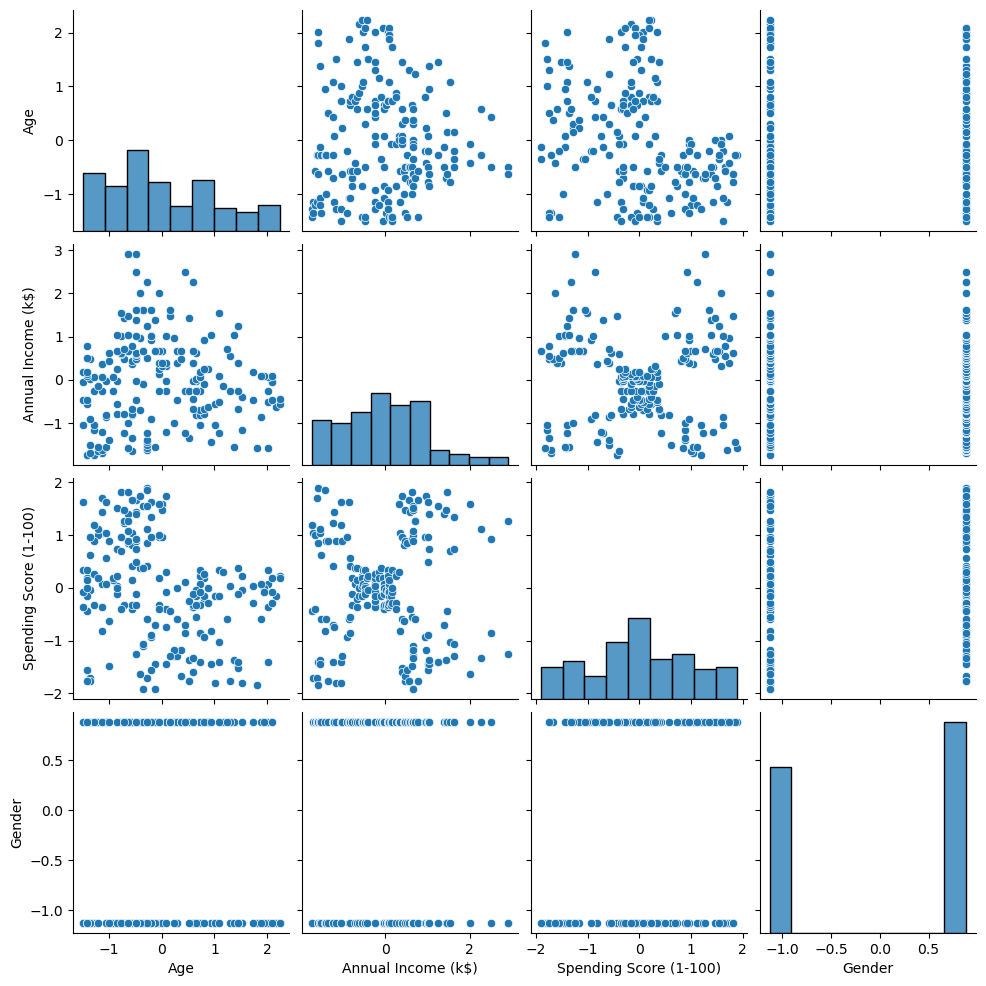

In [12]:
sns.pairplot(scaled_data)
plt.show()



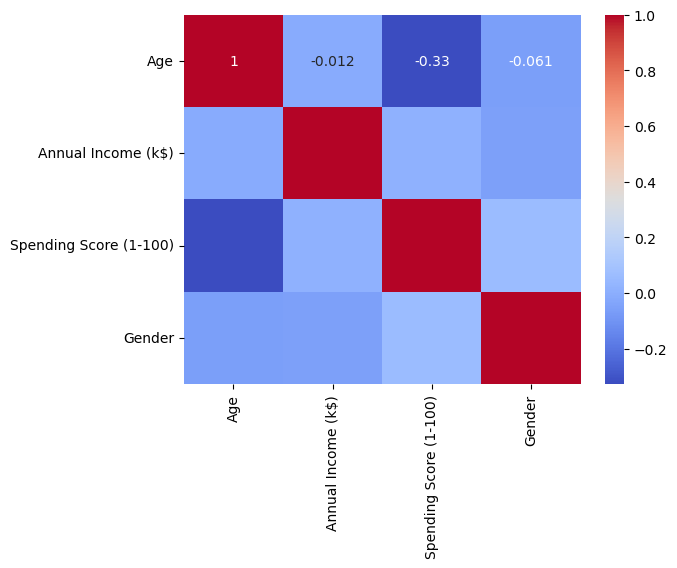

In [13]:
# Visualize the correlation matrix
correlation_matrix = scaled_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
pca = PCA(n_components= 2) # crating PCA object

pca_data = pca.fit_transform(scaled_data)

pca_data_df = pd.DataFrame(pca_data, columns = ["PCA1", "PCA2"]) # reducing the data to 2-dimensions

In [15]:
pca_data_df

,PCA1,PCA2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


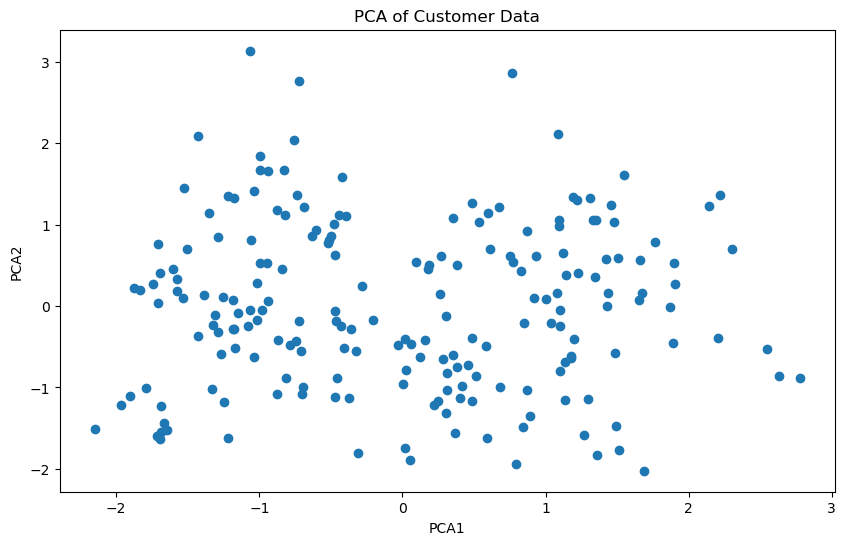

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_data_df['PCA1'], pca_data_df['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Customer Data')
plt.show()

# K-Means Clustering

In [49]:
    
# Finding the opyimal number of clusters using silhoutte scores
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels)) 
    
   

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

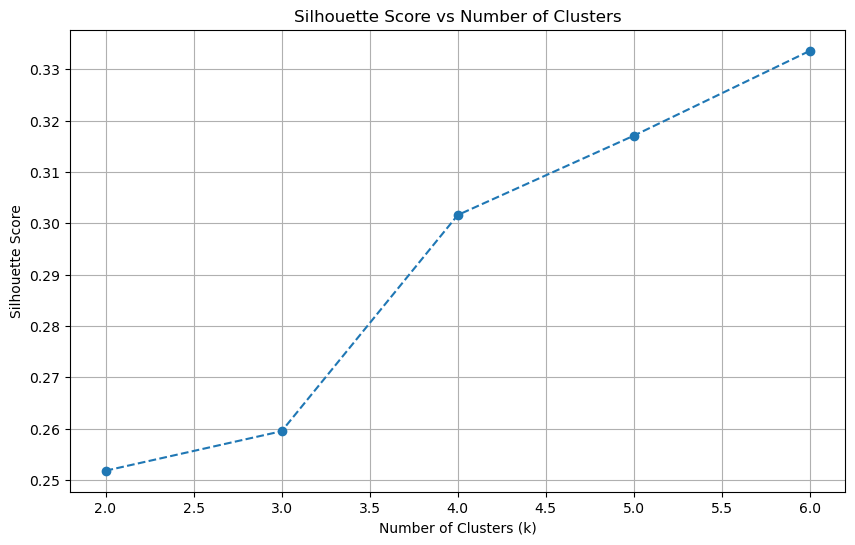

In [50]:

# Plotting silhouette scores to determine optimal k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

In [51]:
# Identify the optimal k
optimal_k = range(2, 7)[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_k}")


The optimal number of clusters is: 6


Using k-Means clustering with the optimal number of clusters

In [48]:
mlflow.set_experiment("Customer Segmentation")

with mlflow.start_run():
    kmeans =KMeans(n_clusters = 6, random_state = 42, n_init = "auto")
    kmeans.fit(scaled_data)

    # Predict cluster labels
    cluster_labels = kmeans.predict(scaled_data)
    
    #calculating evaluation metrics
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_labels)

    # logging parameters and metrics
    mlflow.log_param("n_clusters", 6)
    mlflow.log_metric("inertia", kmeans.inertia_)
    mlflow.log_metric("silhouette_score", silhouette_avg)
    mlflow.log_metric("davies_bouldin_score", davies_bouldin_avg)
    

    # Log the model
    mlflow.sklearn.log_model(kmeans, "kmeans_model")

     # Add cluster labels to the original data

    df["Cluster"] = kmeans.labels_


    

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


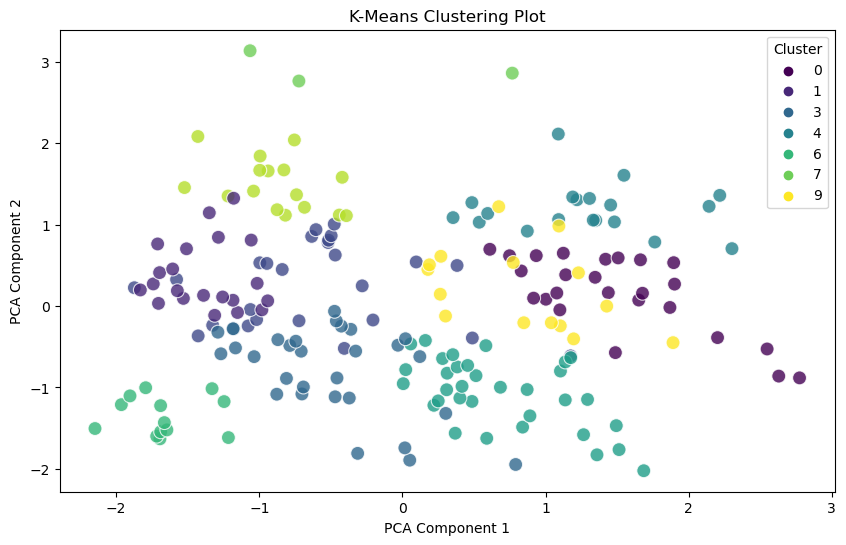

In [32]:
# Plot clusters with PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data_df['PCA1'], y=pca_data_df['PCA2'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.8, edgecolor='w')
plt.title('K-Means Clustering Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [26]:
# Display cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)
print("Cluster Centroids:")
print(centroids_df)

Cluster Centroids:
         Age  Annual Income (k$)  Spending Score (1-100)  Gender
0  58.840000           47.800000               41.000000     0.0
1  32.190476           86.047619               81.666667     1.0
2  25.720000           40.400000               59.000000     0.0
3  28.533333           51.433333               43.033333     1.0
4  39.894737           82.421053               13.842105     0.0
5  52.575758           47.484848               42.242424     1.0
6  25.461538           25.692308               80.538462     1.0
7  31.333333          133.333333               58.333333     0.0
8  33.562500           81.562500               83.187500     0.0
9  44.600000           92.333333               21.600000     1.0
